### 1. Pretvaranje sortiranog niza u BST (Binarno stablo traženja)

Napišite funkciju koja pretvara sortirani niz u binarno stablo pretraživanja . 

Primjer:
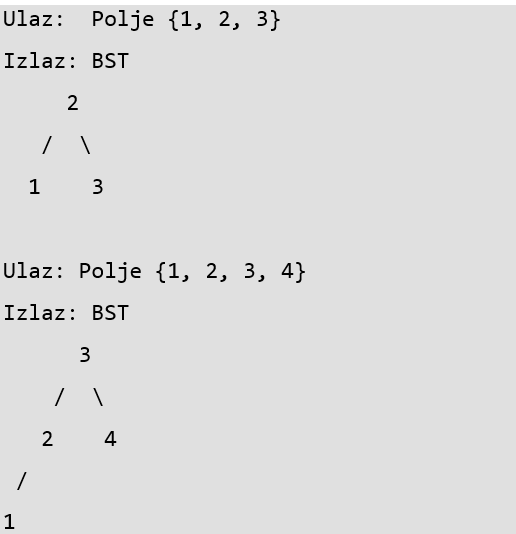


In [1]:
# čvor binarnog stabla
class Node: 
    def __init__(self, d): 
        self.data = d 
        self.left = None
        self.right = None
  
# funkcija za pretvaranje polja u BST
 
# ulaz : sortirano polje integera
# izlaz : BST
def sortedPolje2BST(arr): 
      
    if not arr: 
        return None
  
    # nadji sredinu
    mid = (len(arr)) // 2
      
    # srednji elemnt stavi kao root
    root = Node(arr[mid]) 
      
    # lijevo podstablo ima sve elemente < od srednjeg (mid)
   
    root.left = sortedPolje2BST(arr[:mid]) 
      
    # desno podstablo ima sve lemente > od srednjeg (mid)
    root.right = sortedPolje2BST((arr[mid+1:]))
    # vrati root stabla                             
    return root
  
# Pomocna funkcija za preodrder obilazak
def preOrder(node): 
    if not node: 
        return
      
    print (node.data, end = " ") 
    preOrder(node.left) 
    preOrder(node.right)  
  
# driver program
""" 
Konstruirano stablo treba biti u obliku  
   4 
  / \ 
 2   6 
/ \ / \ 
1 3 5 7 
"""
  
arr = [1, 2, 3, 4, 5, 6, 7] 
root = sortedPolje2BST(arr) 
print ("Preorder obilazak BST ") 
preOrder(root) 

Preorder obilazak BST 
4 2 1 3 6 5 7 

### 2. Konstruirati sva binarna stabla traženja za brojeve između 1 i n

Potrebno je konstruirati sva moguća jedinstvena binarna stabla traženja za brojev iz područja 1 do n.

Primjre:
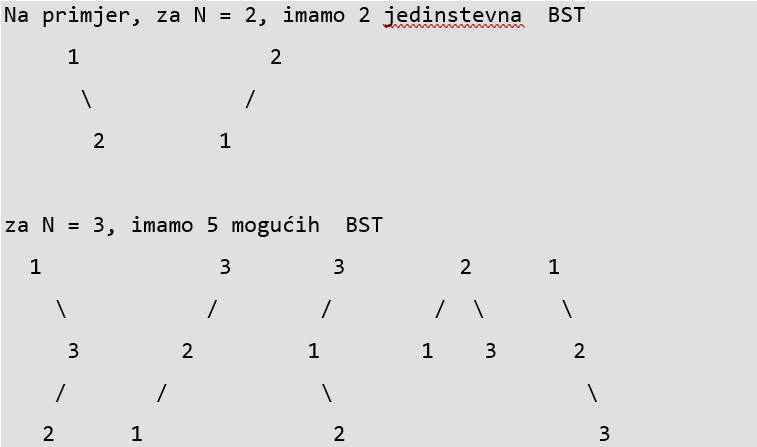


Mogući način rješavanja:

1. Inicijalizirajte praznu listu  listu binarnih stabala traženja (BST)
2. Za svaki broj **i** gdje  i varira od 1 do N, napravite sljedeće
    a. Napravi novi čvor s ključem **i**, neka ovaj čvor bude nazvan „node“
    b. Rekurzivno napravi listu svih lijevih podstabala.
    c. Rekurzivno napravi listu svih desnih podstabala.
3. Ponavljajte u petlji za sve lijeva podstabla

    a. Za trenutno lijevo podstablo, ponavljate u petlji za sva desna podstabla.
    Dodajte trenutačno lijevo i desno podstablo u „node“ i dodajt „node“ u listu.



    

In [2]:

  
# Čvor binarnog stabla

class newNode:  
  
    # Konstruktor novog čvora
    def __init__(self, item):  
        self.key=item 
        self.left = None
        self.right = None
  
# Preoreder obilazak BST
def preorder(root) : 
  
    if (root != None) : 
      
        print(root.key, end = " " ) 
        preorder(root.left)  
        preorder(root.right)  
      
# Funkcija za kreiranje stabla
def constructTrees(start, end):  
  
    list = []  
  
    """ ako je start > end stablo je prazno """
    if (start > end) : 
      
        list.append(None)  
        return list
      
    """ iteriranje kroz sve vrijednosti   
        od start do end radi izgradnje
        lijevog i desnog podstabla rekurzivno """
    for i in range(start, end + 1):  
      
        """ rekurzivna izgradnja lijevog podstabla """
        #print("lijevo", start, i-1)
        leftSubtree = constructTrees(start, i - 1)  
  
        """ rekurzivna izgradnja desnog podstabla """
        #print("desno", i+1, end)
        rightSubtree = constructTrees(i + 1, end)  
  
        """ prolazak kroz sva lijeva i desna   
            podstabla i povezivanje na  root  
        """
    
        for j in range(len(leftSubtree)) : 
            left = leftSubtree[j]  
            for k in range(len(rightSubtree)):  
                right = rightSubtree[k]  
                node = newNode(i)   # vrijednost i postaje root  
                node.left = left    # spoji lijevo podstablo 
                node.right = right    # spoji desno podstablo
                list.append(node)    # dodaj to stablo u listu
                 
    return list
     
# driver kod
if __name__ == '__main__': 
  
    # Napravi sva moguća BST  
    rezultat = constructTrees(1, 3)  
    
    """ Ispis preorder obilaska 
       za sva izgrađena stabla """
    nBST = len(rezultat)
    print("Preorder obilasci za svih {} izgrađenih BST su:".format(nBST)) 
    
    for i in range(nBST):
        
        preorder(rezultat[i]) 
        print() 


Preorder obilasci za svih 5 izgrađenih BST su:
1 2 3 
1 3 2 
2 1 3 
3 1 2 
3 2 1 


### 3. Cikcak obilazak binarnog stabla

Napišite funkciju za ispis Cikcak  binarnog stabla. Za BS na slici obilazak u cikcak bit će 
1 3 2 7 6 5 4
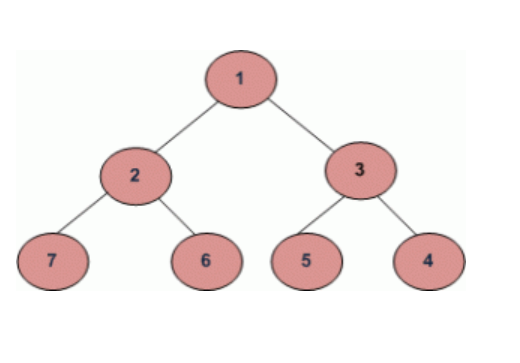

Koristimo pomoćne strukture  tj. dva stoga (currentLevel i nextlevel). Također nam treba jedna pomoćna varijabla (ltr) koja prati redoslijed trenutne razine (bilo s lijeva na desno ili s desna na lijevo). Skidamo sa stoga currentlevel is ispisujemo vrijednost. 

Kad god je redoslijed trenutne razine slijeva udesno, stavimo lijevo dijete, a zatim njegovo desno dijete na niz slijedeće nextLevel. Budući da je stog LIFO (Last-In-First_out) struktura, sljedeći put kad se čvorovi skidaju s nexLevel stoga bit će u obrnutom redoslijedu. 

S druge strane, kada je redoslijed trenutne razine zdesna nalijevo, prvo bismo stavili desno dijete, a zatim lijevo dijete. Konačno, ne zaboravite zamijeniti ta dva stoga na kraju svake razine (tj. Kada je trenutna razina prazna)




In [4]:
# Cikcak obilazak binarnog stabla
  
# Čvor binarnog stabla
class Node: 
    # Konstruktor za kreiranje čvor 
    def __init__(self, data): 
        self.data = data 
        self.left = self.right = None
  
  
# finkcija za cikacak ispis BS

def zizagtraversal(root): 
  
    # Osnovni slučaj
    if root is None: 
        return
  
    # Kreiraj stog za pospremanje tekučeg čvora i sljwedečih razina
   
    currentLevel = [] 
    nextLevel = [] 
  
    # ako je pomocna var ltr true stavljamo 
    # čvorove s lijeva na desno na stoga, a  
    # protivnom s desna na lijevo
      
    ltr = True
  
    # dodaj root na currentlevel stog 
    currentLevel.append(root) 
  
    # Provjera je li prazan stog
    while len(currentLevel) > 0: 
        # skidaj sa stoga
        temp = currentLevel.pop(-1) 
        # ispiši podatak
        print(temp.data, " ", end="") 
  
        if ltr: 
            # ako je ltr true stavi left prije right  
            
            if temp.left: 
                nextLevel.append(temp.left) 
            if temp.right: 
                nextLevel.append(temp.right) 
        else: 
            # u protivnom stavi right prije left 
            if temp.right: 
                nextLevel.append(temp.right) 
            if temp.left: 
                nextLevel.append(temp.left) 
  
        if len(currentLevel) == 0: 
            # promijneni sztanje ltr radi stavljanja čvorova
            # u suprotnom redoslijedu
            ltr = not ltr 
            # swap stogova
            currentLevel, nextLevel = nextLevel, currentLevel 
  
  
# driver kod 
# Za stablo na slici napraviti cikacak ispis
#              1
#            /   \
#           2     3
#          / \   / \
#         7   6  5  4

# izgradnja stabla
root = Node(1) 
root.left = Node(2) 
root.right = Node(3) 
root.left.left = Node(7) 
root.left.right = Node(6) 
root.right.left = Node(5) 
root.right.right = Node(4) 
print("Cikcak obilazak binarnog stabla je:") 
zizagtraversal(root) 

Cikcak obilazak binarnog stabla je:
1  3  2  7  6  5  4  